<a href="https://colab.research.google.com/github/manor-s/DS-course-project-4/blob/main/Classification_Project_Manor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [40]:
import pandas as pd
csv_file_path = '/content/drive/My Drive/e-commerce project/Churn_Modelling.csv'
churn = pd.read_csv(csv_file_path)



# Label Description and EDA summary

## Label Description:

* **RowNumber** - Serial Row Number (from 1 to 10000)

* **CustomerId** - Unique Ids for bank customer identification

* **Surname** - Customer's last name (2932 unique values)

* **CreditScore** - Credit score of the customer

* **Geography** - The country from which the customer belongs

* **Gender** - Male or Female

* **Age** - Age of the customer

* **Tenure** - Number of years for which the customer has been with the bank

* **Balance** - Bank balance of the customer

* **NumOfProducts** - Number of bank products the customer is utilising

* **HasCrCard** - Binary Flag for whether the customer holds a credit card with the bank or not

* **IsActiveMember** - Binary Flag for whether the customer is an active member with the bank or not

* **EstimatedSalary** - Estimated salary of the customer in Dollars

* **Exited** - Binary flag 1 if the customer closed account with bank and 0 if the customer is retained



## Observations related to churn behavior:
* No unexplainable outliers are present.
* No evident interrelationship among the numerical variables.
* **Product Count**: Customers with three or more products exhibit a significantly higher churn rate. Excluding this group could be considered during the modeling process.
* **Geography**: German customers show a distinct churn pattern compared to those from France and Spain.
* **Gender**: Female customers have a higher churn rate than male customers.
* **Active Membership**: Active members tend to have a lower churn rate.
* **Balance**: Accounts with a balance of zero behave differently than those with a positive balance, potentially warranting a separate categorical consideration.
* **Credit Score**: Lower credit scores may correlate with increased churn risk.
* **Age**: Churn rates appear notably higher among customers aged 40 to 60.



# Pre-Processing

In [41]:
import numpy as np

## Making a new categorical variable of Zero Balance or Blance Percentile:

# Define minimum and maximum for positive balances
min_balance = churn.loc[churn['Balance'] > 0, 'Balance'].min()
max_balance = churn['Balance'].max()

# Calculate evenly spaced cutoffs (10 intervals) from min_balance to max_balance
cutoffs = np.linspace(min_balance, max_balance, 10)

# Define labels for each decile (10 labels, one for each decile)
decile_labels = [f'Decile {i+1}' for i in range(10)]

# Assign each balance to the appropriate decile based on these evenly spaced cutoffs
# Add an additional bin edge (-np.inf) for zero balances
churn['Balance_Category'] = pd.cut(
  churn['Balance'],
  bins=[-np.inf, 0] + list(cutoffs),  # Add zero as a separate category
  labels=['Zero Balance'] + decile_labels,     # Add "Zero Balance" label
  include_lowest=True
)


## Making Dummies

churn_from_col_4 = churn.iloc[:, 3:]
churn_dummies = pd.get_dummies(churn_from_col_4, drop_first=False)


In [43]:
churn_dummies.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,NaN,NaN,NaN,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,NaN,NaN,NaN,0.2037,0.402769,0.0,0.0,0.0,0.0,1.0
Geography_France,10000,2,True,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = churn_dummies.drop(columns=['Exited'])
y = churn_dummies['Exited']

# Split the data into training and testing sets, keeping the "Exited" category stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution of the "Exited" category in the train and test sets
print("Train 'Exited' distribution:\n", y_train.value_counts(normalize=True))
print("Test 'Exited' distribution:\n", y_test.value_counts(normalize=True))


Train 'Exited' distribution:
 Exited
0    0.79625
1    0.20375
Name: proportion, dtype: float64
Test 'Exited' distribution:
 Exited
0    0.7965
1    0.2035
Name: proportion, dtype: float64


In [54]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00


Best Parameters: {'C': 0.015171700530511447, 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.813875
Test Accuracy: 0.8065
Precision: 0.5847457627118644
Recall: 0.16953316953316952
F1 Score: 0.26285714285714284


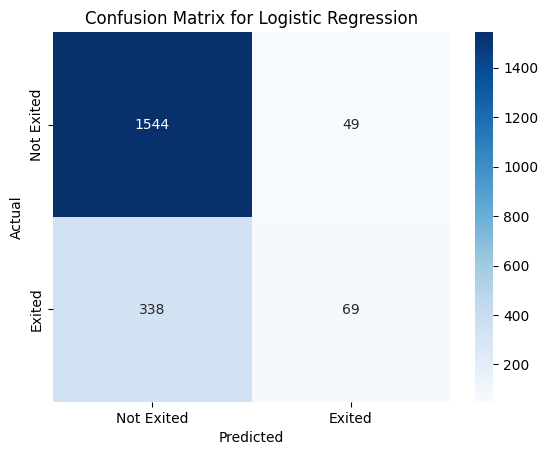


Feature Impact:
                          Feature  Coefficient
1                             Age     0.691280
6                  IsActiveMember    -0.472880
9               Geography_Germany     0.232340
12                    Gender_Male    -0.125574
11                  Gender_Female     0.125574
8                Geography_France    -0.124638
13  Balance_Category_Zero Balance    -0.093462
10                Geography_Spain    -0.088585
0                     CreditScore    -0.081891
22      Balance_Category_Decile 9     0.079149
19      Balance_Category_Decile 6     0.066882
4                   NumOfProducts    -0.063205
14      Balance_Category_Decile 1     0.049031
21      Balance_Category_Decile 8     0.048180
15      Balance_Category_Decile 2     0.047547
23     Balance_Category_Decile 10     0.044108
7                 EstimatedSalary     0.041835
17      Balance_Category_Decile 4    -0.039825
18      Balance_Category_Decile 5     0.034247
5                       HasCrCard    -0.028

In [57]:
import optuna
import logging
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Suppress Optuna's verbose output by setting the logging level to WARNING
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Define the objective function for Optuna
def objective(trial):
  # Define hyperparameters to tune
  C = trial.suggest_float('C', 1e-4, 1e2, log=True)  # Regularization strength
  solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs'])

  # Create a pipeline with scaling and logistic regression
  model = Pipeline([
      ('scaler', StandardScaler()),
      ('log_reg', LogisticRegression(C=C, solver=solver, max_iter=1000, random_state=42))
  ])

  # Perform cross-validation and return the mean accuracy score
  score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
  return score

# Create the Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best parameters and best score
print("Best Parameters:", study.best_params)
print("Best Cross-Validation Score:", study.best_value)

# Train the final model with the best parameters
best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(**study.best_params, max_iter=1000, random_state=42))
])
best_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation results
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Evaluate the impact of each variable
# Extract the coefficients and match them to feature names
coefficients = best_model.named_steps['log_reg'].coef_[0]
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display feature impact
print("\nFeature Impact:")
print(feature_importance[['Feature', 'Coefficient']])
